In [4]:
from braket.aws import AwsDevice
aws_devices = AwsDevice.get_devices()

ClientError: An error occurred (UnrecognizedClientException) when calling the SearchDevices operation: The security token included in the request is invalid.

In [2]:
from qbraid.interface.qbraid_qasm.circuits import qasm_bell
qasm_bell().read()

'// Generated from Cirq v1.1.0\n\nOPENQASM 2.0;\ninclude "qelib1.inc";\n\n\n// Qubits: [q(0), q(1)]\nqreg q[2];\n\n\nh q[0];\ncx q[0],q[1];'

In [8]:
from qbraid.interface.qbraid_qasm.tools import qasm_qubits, qasm_num_qubits, qasm_depth

In [3]:
from qbraid.transpiler.cirq_qasm.qasm_conversions import from_qasm, to_qasm
#from qbraid.interface.qbraid_cirq.circuits import cirq_bell
from qbraid.interface.qbraid_qasm.circuits import qasm_bell
qasm_bell().__module__
#o_qasm(cirq_bell())

AttributeError: 'str' object has no attribute '__module__'

In [7]:
test_str = 'ok'
isinstance(test_str, str)

NameError: name 'instance' is not defined

In [1]:
from qbraid.interface.qbraid_qasm.circuits import qasm_bell, qasm_shared15
from qbraid.interface.qbraid_qasm.tools import qasm_depth
assert qasm_depth(qasm_bell()) == 2
print(qasm_depth(qasm_shared15()))

22


In [ ]:
qasm_num_qubits(to_qasm(cirq_bell()))

In [11]:
print('// Generated from Cirq v1.1.0\n\nOPENQASM 2.0;\ninclude "qelib1.inc";\n\n\n// Qubits: [q(0), q(1)]\nqreg q[2];\n\n\nh q[0];\ncx q[0],q[1];\n')

// Generated from Cirq v1.1.0

OPENQASM 2.0;
include "qelib1.inc";


// Qubits: [q(0), q(1)]
qreg q[2];


h q[0];
cx q[0],q[1];



In [19]:
str(qasm_0)

'OPENQASM 2.0;\ninclude "qelib1.inc";\ngate rzx(param0) q0,q1 { h q1; cx q0,q1; rz(-pi/4) q1; cx q0,q1; h q1; }\ngate ecr q0,q1 { rzx(pi/4) q0,q1; x q0; rzx(-pi/4) q0,q1; }\ngate rzx_6320157840(param0) q0,q1 { h q1; cx q0,q1; rz(2.3200048200765524) q1; cx q0,q1; h q1; }\nqreg q[4];\nqreg a[10];\ncry(5.518945082555831) q[0],q[1];\nu(5.75740842861076,5.870881397684582,1.8535618384181967) q[2];\necr q[3],q[0];\necr a[3],a[0];\nrzx_6320157840(2.3200048200765524) q[2],q[1];\nrccx q[1],q[2],q[3];\ncsx q[0],q[1];\nrxx(5.603791034636421) q[2],q[0];\n'

In [1]:

qasm_0 = """OPENQASM 2.0;
include "qelib1.inc";
gate rzx(param0) q0,q1 { h q1; cx q0,q1; rz(-pi/4) q1; cx q0,q1; h q1; }
gate ecr q0,q1 { rzx(pi/4) q0,q1; x q0; rzx(-pi/4) q0,q1; }
gate rzx_6320157840(param0) q0,q1 { h q1; cx q0,q1; rz(2.3200048200765524) q1; cx q0,q1; h q1; }
qreg q[4];
qreg a[10];
cry(5.518945082555831) q[0],q[1];
u(5.75740842861076,5.870881397684582,1.8535618384181967) q[2];
ecr q[3],q[0];
ecr a[3],a[0];
rzx_6320157840(2.3200048200765524) q[2],q[1];
rccx q[1],q[2],q[3];
csx q[0],q[1];
rxx(5.603791034636421) q[2],q[0];
"""


#from qbraid.interface.qbraid_qasm.tools import _unitary_from_qasm
#print(_unitary_from_qasm(qasm_0))

import re 
#def qasm_depth(qasmstr:str) -> str:
#    """calculate number of depth"""
#    from qbraid.transpiler.cirq_qasm.qasm_conversions import from_qasm
#    from cirq.circuits import Circuit
#    circuit = from_qasm(qasmstr)
#    return len(Circuit(circuit.all_operations()))

QASMType = str
def qasm_qubits(qasmstr:str) -> QASMType:
    """get number of qasm qubits"""
    return [text.replace('\n','') for text in re.findall(r'\bqreg\s\S+\n\b', qasmstr)]
print(qasm_qubits(qasm_0))

def qasm_num_qubits(qasmstr:str) -> QASMType:
    """calculate number of qubits"""
    q_num = 0
    for num in qasm_qubits(qasmstr):
      q_num += int(re.search(r'\d+', num).group())
    return q_num
print(qasm_num_qubits(qasm_0))

#def qasm_depth():
#    """calculate number of depth"""
#    
#    pass
#
#from qbraid.transpiler.cirq_qasm.qasm_conversions import from_qasm
#from qbraid.transpiler.cirq_qasm.qasm_preprocess import convert_to_supported_qasm
#print(from_qasm(qasm_0).all_qubits())

#print(qasm_depth(qasm_0))

['qreg q[4];', 'qreg a[10];']
14


In [3]:
from qbraid.api import QbraidSession
def device_wrapper_inputs(vendor: str):
    """Returns list of tuples containing all device_wrapper inputs for given vendor."""
    session = QbraidSession()
    devices = session.get("/public/lab/get-devices", params={}).json()
    print(devices)
    input_list = []
    for document in devices:
        if document["vendor"] == vendor:
            input_list.append(document["qbraid_id"])
    return input_list

b = device_wrapper_inputs("AWS")

[{'numberQubits': 7, 'objArg': 'ibm_nairobi', 'objRef': 'IBMQ', 'pendingJobs': '0', 'statusRefresh': '2023-02-15T14:03:57.657Z', 'visibility': 'public', 'connectivityGraph': [], '_id': '622979b2d3e5f145307a5f71', 'qbraid_id': 'ibm_q_nairobi', 'name': 'Nairobi', 'provider': 'IBM', 'paradigm': 'gate-based', 'type': 'QPU', 'dateDeployed': '2021', 'location': 'Armonk, NY, USA', 'vendor': 'IBM', 'runPackage': 'qiskit', 'requiresCred': True, 'status': 'ONLINE', '_code': 1, 'calibrationData': [], 'publishedStudies': [], 'createdAt': '2022-03-10T04:08:18.469Z', 'updatedAt': '2023-02-15T14:03:57.711Z', '__v': 0, 'architecture': 'superconducting'}, {'numberQubits': 5, 'objArg': 'ibmq_belem', 'objRef': 'IBMQ', 'pendingJobs': '0', 'statusRefresh': '2023-02-15T14:03:57.658Z', 'visibility': 'public', 'connectivityGraph': [], '_id': '622979b2d3e5f145307a5f75', 'qbraid_id': 'ibm_q_belem', 'name': 'Belem', 'provider': 'IBM', 'paradigm': 'gate-based', 'type': 'QPU', 'dateDeployed': '2020', 'location': '

In [1]:
from braket.aws import AwsDevice

device = AwsDevice('arn:aws:braket:::device/quantum-simulator/amazon/sv1')   
device.is_available

ClientError: An error occurred (UnrecognizedClientException) when calling the GetDevice operation: The security token included in the request is invalid.

In [2]:
from qbraid import device_wrapper
qbraid_device = device_wrapper('aws_dm_sim')
qbraid_device

In [11]:
def methodinclasses(classes):
    return [
        method for method in dir(classes) if (
            method.startswith('_') is False
        )
    ]

In [1]:
from qbraid.devices.aws import BraketDeviceWrapper
from braket.aws import AwsDevice

device = AwsDevice('arn:aws:braket:::device/quantum-simulator/amazon/sv1')   
BraketDeviceWrapper(device)

ClientError: An error occurred (UnrecognizedClientException) when calling the GetDevice operation: The security token included in the request is invalid.

In [1]:
from qbraid.api import ApiError, QbraidSession
session = QbraidSession()

# get-devices must be a POST request with kwarg `json` (not `data`) to
# encode the query. This is because certain queries contain regular
# expressions which cannot be encoded in GET request `params`.
devices = session.post("/public/lab/get-devices", json={}).json()

In [19]:
pytket_circuit


[H q[1]; CX q[1], q[0]; ]

In [20]:
cirq_circuit

0: ───H───@───
          │
1: ───────X───

In [3]:
import pytket
pytket.Circuit(2)

[]

In [18]:
import numpy as np
import pytest
from cirq import Circuit, LineQubit, ops, testing

from qbraid.interface import circuits_allclose
from qbraid.transpiler.cirq_pytket.convert_pytket_qasm import to_pytket
from qbraid.transpiler.exceptions import CircuitConversionError

qreg = LineQubit.range(2)
cirq_circuit = Circuit([ops.H.on(qreg[0]), ops.CNOT.on(qreg[0], qreg[1])])
pytket_circuit = to_pytket(cirq_circuit)
print()
print(cirq_circuit)
print()
print(pytket_circuit)
print()
assert circuits_allclose(pytket_circuit, cirq_circuit, strict_gphase=True)


0: ───H───@───
          │
1: ───────X───

<tket::Circuit, qubits=2, gates=2>



AssertionError: 

In [3]:
from pytket.circuit import OpType, QubitRegister, BitRegister, Circuit as TKCircuit, Command
import numpy as np
from pytket.circuit.display import render_circuit_jupyter
from pytket.utils import QubitPauliOperator
from pytket.utils.symbolic import circuit_to_symbolic_unitary
from qbraid.transpiler.cirq_pytket.convert_pytket_qasm import from_pytket, to_pytket
c = TKCircuit(10,2, name="example")
#c.add_gate(OpType.XXPhase, 0.5, [0, 1])
c.add_gate(OpType.noop , [], [0])
c.CU1(np.pi/2,2,3)
c.ISWAPMax(0,1)
c.Z(0)
c.get_unitary()
c.add_barrier([0,1])
render_circuit_jupyter(c)
#from_pytket(c)

In [23]:
a = list(map(max, [gate.qubits for gate in c.get_commands()[:2]]))
print(c.get_commands()[:2])
print(max(a))
#max(max(a))

[CnZ q[0], q[1], q[2];, ISWAPMax q[0], q[1];]
q[2]


In [4]:
type(c.get_commands())

list

In [5]:
type(c.get_commands())

list

In [17]:
type(gates)

list

In [16]:
gates = c.get_commands()
print(type(gates),isinstance(list, type(gates)))
[gates] if isinstance(list, type(gates)) else gates

<class 'list'> False


[CU1(1.5708) q[2], q[3];]

In [3]:
c = TKCircuit(10,2, name="example")
c.CU1(np.pi/2,2,3)
#c.add_gate(OpType.CnZ, [], [0, 1,2])
from qbraid.interface.qbraid_pytket.tools import _gate_to_matrix_pytket
_gate_to_matrix_pytket(gates = c.get_commands()[0],flat=False)


TypeError: 'pytket._tket.circuit.Command' object is not iterable

In [21]:
pytket_circuit = TKCircuit(2)
pytket_circuit.H(0)
pytket_circuit.CX(0,1)

[H q[0]; CX q[0], q[1]; ]

In [17]:
2**4

16

In [28]:
2**2

4

In [21]:
max(c.get_commands()[:2][0].qubits)

q[2]

In [ ]:
map(qubits,c.get_commands()[:2])

In [29]:
a = [gate.qubits for gate in c.get_commands()[:2]]
out = []
for sublist in a:
    out.extend(sublist)

In [31]:
max(out)

q[2]

In [27]:
np.max(c.get_commands()[:2])

TypeError: '>=' not supported between instances of 'pytket._tket.circuit.Command' and 'pytket._tket.circuit.Command'

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+1.j, 0.+0.j],
       [0.+0.j, 0.+1.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j]])

In [11]:
from qbraid.transpiler.cirq_qiskit.conversions import from_qiskit
pytket_circuit = TKCircuit(4)
for i in range(4):
    pytket_circuit.H(i)
for i in range(2):
    pytket_circuit.X(i)
pytket_circuit.Y(2)
pytket_circuit.Z(3)
pytket_circuit.S(0)
pytket_circuit.Sdg(1)
pytket_circuit.T(2)
pytket_circuit.Tdg(3)
pytket_circuit.Rx(np.pi / 4, 0)
pytket_circuit.Ry(np.pi / 2, 1)
pytket_circuit.Rz(3 * np.pi / 4, 2)
pytket_circuit.U1(np.pi / 8, 3)
pytket_circuit.SX(0)
pytket_circuit.SXdg(1)
pytket_circuit.ISWAPMax(2, 3)
for i in range(2):
    pytket_circuit.SWAP(i,i+2)
pytket_circuit.CX(0, 1)
pytket_circuit.CU1(np.pi / 4, 2, 3)
cirq_circuit = from_pytket(pytket_circuit)

CircuitConversionError: Cirq qasm converter doesn't yet support qasm3.

In [6]:
c.remove_blank_wires()
render_circuit_jupyter(c)

In [28]:
from pytket.passes import CommuteThroughMultis, RemoveRedundancies, RepeatPass,RemoveBarriers

In [3]:
#pytket_circuit = TKCircuit(2)
#pytket_circuit.ISWAPMax(0,1)
cirq_circuit = from_pytket(c)
cirq_circuit

0: ───S───────
      │
1: ───@───Z───

In [2]:
print(pytketcircuit.get_unitary()[0])
print(_unitary_from_qiskit(circuit)[0])

[-0.15606649-0.05469703j -0.15606649-0.05469703j  0.15606649+0.05469703j
  0.15606649+0.05469703j  0.        +0.j          0.        +0.j
  0.        +0.j          0.        +0.j         -0.44530297-0.15606649j
 -0.44530297-0.15606649j  0.44530297+0.15606649j  0.44530297+0.15606649j
  0.        +0.j          0.        +0.j          0.        +0.j
  0.        +0.j        ]
[-0.1767767-0.4267767j -0.0732233-0.1767767j  0.       +0.j
  0.       +0.j         0.1767767+0.4267767j  0.0732233+0.1767767j
  0.       +0.j         0.       +0.j        -0.1767767-0.4267767j
 -0.0732233-0.1767767j  0.       +0.j         0.       +0.j
  0.1767767+0.4267767j  0.0732233+0.1767767j  0.       +0.j
  0.       +0.j       ]


In [1]:
import pkg_resources
def _get_entrypoints(group: str):
    """Returns a dictionary mapping each entry of ``group`` to its loadable entrypoint."""
    return {entry.name: entry for entry in pkg_resources.iter_entry_points(group)}
_get_entrypoints("qbraid.transpiler")

{'braket': EntryPoint.parse('braket = qbraid.transpiler:BraketCircuitWrapper'),
 'cirq': EntryPoint.parse('cirq = qbraid.transpiler:CirqCircuitWrapper'),
 'pyquil': EntryPoint.parse('pyquil = qbraid.transpiler:PyQuilProgramWrapper'),
 'pytket': EntryPoint.parse('pytket = qbraid.transpiler:PytketCircuitWrapper'),
 'qiskit': EntryPoint.parse('qiskit = qbraid.transpiler:QiskitCircuitWrapper')}

In [6]:
import qbraid.transpiler
dir(qbraid.transpiler)

['BraketCircuitWrapper',
 'CircuitConversionError',
 'CirqCircuitWrapper',
 'PyQuilProgramWrapper',
 'PytketCircuitWrapper',
 'QasmError',
 'QiskitCircuitWrapper',
 'QuantumProgramWrapper',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'cirq_braket',
 'cirq_pyquil',
 'cirq_pytket',
 'cirq_qasm',
 'cirq_qiskit',
 'conversions',
 'convert_from_cirq',
 'convert_to_cirq',
 'custom_gates',
 'exceptions',
 'wrappers']

In [16]:
pytket_bell = TKCircuit(2)
pytket_bell.ISWAP(1,0,1)
from pytket.qasm import circuit_to_qasm_str
print(circuit_to_qasm_str(pytket_bell))

OPENQASM 2.0;
include "qelib1.inc";

qreg q[2];
gate iswap (param0) iswapq0,iswapq1 {
u3(0.5*pi,0.0*pi,0.5*pi) iswapq0;
u3(1.5*pi,1.5*pi,0.5*pi) iswapq1;
cx iswapq0,iswapq1;
u3((1 - 0.5*param0)*pi,1.5*pi,0.0*pi) iswapq0;
u3(1.5*pi,1.5*pi,(0.5*param0 + 2.5)*pi) iswapq1;
cx iswapq0,iswapq1;
u3(0.5*pi,1.5*pi,0.5*pi) iswapq0;
}
iswap(1.0*pi) q[0],q[1];



In [1]:
from qbraid.wrappers import circuit_wrapper
from qbraid.interface.programs import bell_data,shared15_data
from pytket.circuit.display import render_circuit_jupyter
from qbraid.interface.qbraid_qiskit.tools import _unitary_from_qiskit
from qbraid.interface.qbraid_pytket.tools import _unitary_from_pytket
map, _ = shared15_data()
qiskit_bell = map["qiskit"]()
pytket_bell = map["pytket"]()
test_case = circuit_wrapper(qiskit_bell).transpile('pytket')
print(qiskit_bell)
render_circuit_jupyter(pytket_bell)
render_circuit_jupyter(test_case)

     ┌───┐┌───┐ ┌───┐ ┌─────────┐   ┌────┐                 
q_0: ┤ H ├┤ X ├─┤ S ├─┤ Rx(π/4) ├───┤ √X ├───X────────■────
     ├───┤├───┤┌┴───┴┐├─────────┤  ┌┴────┴┐  │      ┌─┴─┐  
q_1: ┤ H ├┤ X ├┤ Sdg ├┤ Ry(π/2) ├──┤ √Xdg ├──┼──X───┤ X ├──
     ├───┤├───┤└┬───┬┘├─────────┴┐┌┴──────┴┐ │  │   └───┘  
q_2: ┤ H ├┤ Y ├─┤ T ├─┤ Rz(3π/4) ├┤0       ├─X──┼──■───────
     ├───┤├───┤┌┴───┴┐└┬────────┬┘│  Iswap │    │  │P(π/4) 
q_3: ┤ H ├┤ Z ├┤ Tdg ├─┤ P(π/8) ├─┤1       ├────X──■───────
     └───┘└───┘└─────┘ └────────┘ └────────┘               


In [67]:
def _gate_to_matrix_pytket(gate: Command) -> np.ndarray:
    gate_op = gate.op
    pytket_circuit = TKCircuit(gate_op.n_qubits)
    pytket_circuit.add_gate(gate_op.type, gate_op.params, gate.qubits)
    return pytket_circuit.get_unitary()
_gate_to_matrix_pytket(c.get_commands()[0])

array([[1.        +0.j        , 0.        +0.j        ,
        0.        +0.j        , 0.        +0.j        ],
       [0.        +0.j        , 0.22058404+0.j        ,
        0.        -0.97536797j, 0.        +0.j        ],
       [0.        +0.j        , 0.        -0.97536797j,
        0.22058404+0.j        , 0.        +0.j        ],
       [0.        +0.j        , 0.        +0.j        ,
        0.        +0.j        , 1.        +0.j        ]])

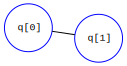

In [2]:
from pytket.utils import Graph

G = Graph(c)
G.get_DAG()

# The small numbers (0 and 1) shown at the entry to and exit from the two-qubit gates represent "port numbers" on the gates; these allow us to track individual qubits, which may be placed in a different order on entry and exit in order to simplify the layout.
#
# The `Graph` class also has methods to save this image to a file and to open it in a PDF viewer.
#
# We can also view the qubit connectivity graph of a circuit:

G.get_qubit_graph()


In [9]:
c.get_commands()[0].op.params

[0.5]

In [34]:
c.get_commands()[0].qubits

[q[0], q[1]]

In [87]:
c.to_dict()["commands"][0]['']

{'args': [['q', [0]], ['q', [1]]], 'op': {'params': ['0.5'], 'type': 'CU1'}}

In [49]:
c.get_unitary()

array([[1.000000e+00+0.j, 0.000000e+00+0.j, 0.000000e+00+0.j,
        0.000000e+00+0.j],
       [0.000000e+00+0.j, 1.000000e+00+0.j, 0.000000e+00+0.j,
        0.000000e+00+0.j],
       [0.000000e+00+0.j, 0.000000e+00+0.j, 1.000000e+00+0.j,
        0.000000e+00+0.j],
       [0.000000e+00+0.j, 0.000000e+00+0.j, 0.000000e+00+0.j,
        6.123234e-17+1.j]])

In [33]:
pytket_circuit = TKCircuit(1)
pytket_circuit.add_gate(OpType.Z, [0])

[Z q[0]; ]

In [16]:
circuit_to_symbolic_unitary(Optype.Z)

AttributeError: 'pytket._tket.circuit.OpType' object has no attribute 'n_qubits'

In [7]:
TKCircuit.add_unitary1qbox().get_circuit(OpType.Z)

TypeError: add_unitary1qbox(): incompatible function arguments. The following argument types are supported:
    1. (self: pytket._tket.circuit.Circuit, unitarybox: pytket._tket.circuit.Unitary1qBox, qubit_0: int, **kwargs) -> pytket._tket.circuit.Circuit
    2. (self: pytket._tket.circuit.Circuit, unitarybox: pytket._tket.circuit.Unitary1qBox, qubit_0: pytket._tket.circuit.Qubit, **kwargs) -> pytket._tket.circuit.Circuit

Invoked with: 

In [1]:
import cirq
from qbraid.transpiler.cirq_qiskit.conversions import to_qiskit
qreg = cirq.LineQubit.range(2)
cirq_circuit = cirq.Circuit([cirq.ops.H.on(qreg[0]), cirq.ops.CNOT.on(qreg[0], qreg[1])])
qiskit_circuit = to_qiskit(cirq_circuit)
print()
print(cirq_circuit)
print()
print(qiskit_circuit)
print()


0: ───H───@───
          │
1: ───────X───

          ┌───┐
q_0: ─────┤ X ├
     ┌───┐└─┬─┘
q_1: ┤ H ├──■──
     └───┘     



In [1]:
from qbraid.interface import convert_to_contiguous
from qbraid.transpiler.custom_gates import _map_zpow_and_unroll
contig_circuit = convert_to_contiguous(cirq_circuit, rev_qubits=True)
compat_circuit = _map_zpow_and_unroll(contig_circuit)

NameError: name 'cirq_circuit' is not defined

In [14]:
if opr in list(contig_circuit.all_operations())
    

H(q(1))
CNOT(q(1), q(0))


In [24]:
import numpy as np
import pytest
from qiskit import QuantumCircuit
from qiskit.circuit.random import random_circuit

from qbraid.interface import circuits_allclose, convert_to_contiguous
from qbraid.transpiler.cirq_qiskit.conversions import from_qiskit
qiskit_circuit = QuantumCircuit(2)
qiskit_circuit.h(0)
qiskit_circuit.cx(0, 1)
cirq_circuit = from_qiskit(qiskit_circuit)

In [3]:
from qbraid.transpiler.cirq_pyquil.conversions import to_pyquil
q0 = cirq.LineQubit(0)
circuit = cirq.Circuit(
    cirq.bit_flip(p=0.2).on(q0),
    cirq.measure(q0, key='result')
)
to_pyquil(circuit)

ValueError: Cannot output operation as QUIL: cirq.bit_flip(p=0.2).on(cirq.LineQubit(0))

In [4]:
'Cannot output operation as QASM: cirq.bit_flip(p=0.2).on(cirq.LineQubit(0))'[32:]

' cirq.bit_flip(p=0.2).on(cirq.LineQubit(0))'

In [19]:
import numpy as np
from pyquil import Program
from pyquil.gates import CNOT, CZ, RZ, H, X, Y, Z,RX
from pyquil.noise import dephasing_kraus_map
from pyquil.noise import (_get_program_gates,
    _decoherence_noise_model,apply_noise_model)

from qbraid.transpiler.cirq_pyquil.conversions import from_pyquil, to_pyquil
p = Program()
p += RX(-np.pi/2,0)
noise_model = _decoherence_noise_model(_get_program_gates(p))
p = apply_noise_model(p,noise_model)
p_test = to_pyquil(from_pyquil(p, compat=False), compat=False)

UnsupportedQuilInstruction: 
Please remove PRAGMAs from your Quil program.
If you would like to add noise, do so after conversion.


In [1]:
from qiskit.providers.aer.noise.passes import RelaxationNoisePass

from qiskit import transpile
from qiskit. circuit import Delay, QuantumCircuit
from qiskit.circuit.library.standard_gates import SXGate, CXGate
from qbraid.transpiler.cirq_qiskit.conversions import from_qiskit

circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0, 1)
circ.measure_all()
circ = transpile(circ,
                 basis_gates=["rz", "sx", "cx"],
                 scheduling_method="alap",
                 instruction_durations=[
                     ("rz", None, 0),
                     ("sx", None, 160),
                     ("cx", None, 800),
                     ("measure", None, 20000)
                 ])
t1s = t2s = [1e-4, 2e-4]
noise_pass = RelaxationNoisePass(t1s=t1s, t2s=t2s, dt=1e-9, op_types=[CXGate])
noisy_circ = noise_pass(circ)
noisy_circ.draw()
from_qiskit(noisy_circ)

CircuitConversionError: cirq's qasm doesn't support qasm3 yet.

In [22]:
list(map(type,list(contig_circuit.all_operations())))

[cirq.ops.gate_operation.GateOperation, cirq.ops.gate_operation.GateOperation]

In [4]:
dir(compat_circuit)

['__abstractmethods__',
 '__add__',
 '__array_priority__',
 '__bool__',
 '__class__',
 '__copy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__pow__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_approx_eq_',
 '_can_add_op_at',
 '_control_keys_',
 '_decompose_',
 '_first_moment_operating_on',
 '_from_json_dict_',
 '_from_moments',
 '_has_op_at',
 '_has_superoperator_',
 '_has_unitary_',
 '_insert_operations',
 '_is_parameterized_',
 '_json_dict_',
 '_load_contents_with_earliest_strategy',
 '_measurement_key_names_',
 '_measurement_key_objs_',
 '_moments',

In [9]:
dir(compat_circuit.all_operations())

['__class__',
 '__del__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__name__',
 '__ne__',
 '__new__',
 '__next__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'close',
 'gi_code',
 'gi_frame',
 'gi_running',
 'gi_yieldfrom',
 'send',
 'throw']

In [2]:
import qbraid
qbraid.get_devices()

Provider,Name,qBraid ID,Status
AWS,Braket Default Simulator,aws_braket_default_sim,●
AWS,DM1,aws_dm_sim,●
AWS,SV1,aws_sv_sim,●
AWS,TN1,aws_tn_sim,●
Google,Bristlecone,google_bristlecone,○
Google,Cirq Density Matrix Simulator,google_cirq_dm_sim,●
Google,Cirq Sparse Simulator,google_cirq_sparse_sim,●
Google,Foxtail,google_foxtail,○
Google,Sycamore,google_sycamore,○
Google,Sycamore23,google_sycamore23,○


In [13]:
from qbraid import device_wrapper
qbraid_device = device_wrapper('aws_dm_sim')
print(qbraid_device.is_available)

S3 Bucket [None]: S3 Bucket Folder [None]: S3 Bucket [None]: S3 Bucket Folder [None]: 

ClientError: An error occurred (UnrecognizedClientException) when calling the GetDevice operation: The security token included in the request is invalid.

In [86]:
from braket.circuits import gates as braket_gates, noises as braket_noise_gate
def classesinmodule(module):
    """looking for class"""
    md = module.__dict__
    return [
        md[c] for c in md if (
            isinstance(md[c], type) and md[c].__module__ == module.__name__
        )
    ]

def methodinclasses(classes):
    return [
        method for method in dir(classes) if (
            method.startswith('_') is False
        )
    ]


classesinmodule(noises)

[braket.circuits.noises.BitFlip,
 braket.circuits.noises.PhaseFlip,
 braket.circuits.noises.PauliChannel,
 braket.circuits.noises.Depolarizing,
 braket.circuits.noises.TwoQubitDepolarizing,
 braket.circuits.noises.TwoQubitDephasing,
 braket.circuits.noises.TwoQubitPauliChannel,
 braket.circuits.noises.AmplitudeDamping,
 braket.circuits.noises.GeneralizedAmplitudeDamping,
 braket.circuits.noises.PhaseDamping,
 braket.circuits.noises.Kraus]

In [ ]:
include:
[braket.circuits.noises.BitFlip,
 braket.circuits.noises.PhaseFlip,
 braket.circuits.noises.Depolarizing,
 braket.circuits.noises.TwoQubitDepolarizing,
 braket.circuits.noises.AmplitudeDamping,
 braket.circuits.noises.GeneralizedAmplitudeDamping,
 braket.circuits.noises.PhaseDamping,
 braket.circuits.noises.Kraus]

Not include, because cirq doens't have:
[braket.circuits.noises.TwoQubitDephasing,
 braket.circuits.noises.TwoQubitPauliChannel,
 braket.circuits.noises.PauliChannel]


In [83]:
braket_gates.ISwap.fixed_qubit_count()

2

In [85]:
import inspect
  
# use signature()
for gate in classesinmodule(braket_gates):
    if not isinstance(gate, braket_gates.PulseGate):
        param_num = len(list(inspect.signature(gate).parameters))
        #print(param_num)
        if param_num == 0 and gate.fixed_qubit_count() == 2:
            print(gate)

<class 'braket.circuits.gates.CNot'>
<class 'braket.circuits.gates.Swap'>
<class 'braket.circuits.gates.ISwap'>
<class 'braket.circuits.gates.CV'>
<class 'braket.circuits.gates.CY'>
<class 'braket.circuits.gates.CZ'>
<class 'braket.circuits.gates.ECR'>


In [32]:


if not test_case.instructions[0].operator.__module__ == braket_noise_gate:
    print('ok')

ok


In [1]:
from qbraid import circuit_wrapper
from braket.circuits.instruction import Instruction
from braket.circuits import Circuit as BKCircuit
import numpy as np
from braket.devices import LocalSimulator
import matplotlib.pyplot as plt
from qbraid.transpiler.cirq_braket.convert_from_braket import from_braket
from braket.circuits import gates as braket_gates, noises as braket_noise_gate
from cirq import ops as cirq_ops
from cirq import protocols
%matplotlib inline

E0 = np.sqrt(0.8) * np.eye(4)
E1 = np.sqrt(0.2) * np.kron(np.array([[0, 1], [1, 0]]), np.array([[0, 1], [1, 0]]))
#braket_circuit = Circuit().kraus((0,1), matrices=[K0, K1])
braket_circuit = BKCircuit().two_qubit_depolarizing(0, 1, probability=0.1)#.h(0)
cirq_circuit = circuit_wrapper(braket_circuit).transpile('cirq')

In [2]:
braket_circuit = BKCircuit()
pgates = [
    braket_noise_gate.BitFlip,
    braket_noise_gate.PhaseFlip,
    braket_noise_gate.Depolarizing,
    braket_noise_gate.AmplitudeDamping,
    braket_noise_gate.PhaseDamping,
]
probs = np.random.uniform(low=0, high=0.5, size=(len(pgates)))  # pylint: disable=no-member
instructions = [Instruction(rot(p), target=[0]) for rot, p in zip(pgates, probs)]
for instr in instructions:
    braket_circuit.add_instruction(instr)
cirq_circuit = from_braket(braket_circuit)
cirq_circuit

0: ───BF(0.189)───PF(0.294)───D(0.3)───AD(0.226)───PD(0.287)───

In [33]:
ops.DepolarizingChannel(p=0.1,n_qubits=2)

cirq.depolarize(p=0.1,n_qubits=2)

In [34]:
from cirq import Circuit, LineQubit, ops, testing
#K0 = np.sqrt(0.8) * np.eye(4)
#K1 = np.sqrt(0.2) * np.kron(np.array([[0, 1], [1, 0]]), np.array([[0, 1], [1, 0]]))
cirq_circuit = Circuit(ops.TwoQubitDephasing(0.1,2))


AttributeError: module 'cirq.ops' has no attribute 'TwoQubitDephasing'

In [29]:
noise_gate = braket_noise_gate.TwoQubitDephasing
braket_circuit = BKCircuit()
probs = np.random.uniform(low=0, high=0.5)  # pylint: disable=no-member
instructions = Instruction(noise_gate(probs), target=[0,1])
braket_circuit.add_instruction(instructions)
cirq_circuit = from_braket(braket_circuit)
print(cirq_circuit)

AttributeError: 'list' object has no attribute 'shape'

In [41]:
dir(test_single_probability_noise_gate(braket_noise_gate.BitFlip))

0: ───BF(0.0734)───


['__abstractmethods__',
 '__add__',
 '__array_priority__',
 '__bool__',
 '__class__',
 '__copy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__pow__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_approx_eq_',
 '_can_add_op_at',
 '_control_keys_',
 '_decompose_',
 '_first_moment_operating_on',
 '_from_json_dict_',
 '_from_moments',
 '_has_op_at',
 '_has_superoperator_',
 '_has_unitary_',
 '_insert_operations',
 '_is_parameterized_',
 '_json_dict_',
 '_load_contents_with_earliest_strategy',
 '_measurement_key_names_',
 '_measurement_key_objs_',
 '_moments',

In [45]:
test_single_probability_noise_gate(braket_noise_gate.BitFlip)

0: ───BF(0.468)───


ValueError: Cannot output operation as QASM: cirq.bit_flip(p=0.4675588616784733).on(cirq.LineQubit(0))

In [43]:
from qbraid.interface.qbraid_braket.tools import _unitary_from_braket
from qbraid.interface.qbraid_cirq.tools import _unitary_from_cirq
_unitary_from_cirq(test_single_probability_noise_gate(braket_noise_gate.BitFlip))

0: ───BF(0.117)───


TypeError: Operation without a known matrix or decomposition: cirq.bit_flip(p=0.11742558887885862).on(cirq.LineQubit(0))

In [39]:
from qbraid.interface import circuits_allclose, to_unitary
import pytest
@pytest.mark.parametrize(
    "noise_gate",
    [
        braket_noise_gate.BitFlip,
        braket_noise_gate.PhaseFlip,
        braket_noise_gate.Depolarizing,
        braket_noise_gate.AmplitudeDamping,
        braket_noise_gate.PhaseDamping,
    ],
)
def test_single_probability_noise_gate(noise_gate):
    """Testing converting circuits containing one-probability noise gates"""
    braket_circuit = BKCircuit()
    probs = np.random.uniform(low=0, high=0.5)  # pylint: disable=no-member
    instructions = Instruction(noise_gate(probs), target=[0])
    braket_circuit.add_instruction(instructions)
    cirq_circuit = from_braket(braket_circuit)
    print(cirq_circuit)
    return cirq_circuit
    assert circuits_allclose(braket_circuit, cirq_circuit, strict_gphase=True)
test_single_probability_noise_gate(braket_noise_gate.BitFlip)

0: ───BF(0.375)───


0: ───BF(0.375)───

In [23]:
pytest.main(args=[''])


============================= test session starts ==============================
platform linux -- Python 3.9.10, pytest-6.2.5, py-1.11.0, pluggy-1.0.0
benchmark: 4.0.0 (defaults: timer=time.perf_counter disable_gc=False min_rounds=5 min_time=0.000005 max_time=1.0 calibration_precision=10 warmup=False warmup_iterations=100000)
rootdir: /mnt/c/Users/poig/Documents/GitHub/qBraid, configfile: pyproject.toml
plugins: anyio-3.6.2, jupyter-pytest-2-1.0.1, benchmark-4.0.0, nbmake-0.5
collected 5 items

. .....                                                                  [100%]

============================== 5 passed in 0.03s ===============================


<ExitCode.OK: 0>

In [28]:
from qbraid.interface import convert_to_contiguous
for opr in convert_to_contiguous(cirq_circuit).all_operations():
    print(opr, type(opr),type(opr.gate), protocols.num_qubits(opr))#, range(len(convert_to_contiguous(cirq_circuit).all_qubits())))
    try:
        print('gamma',opr.gate._gamma)
    except:
        print(opr.gate._p)
    print()
    

bit_flip(p=0.005948287739776237)(q(0)) <class 'cirq.ops.gate_operation.GateOperation'> <class 'cirq.ops.common_channels.BitFlipChannel'> 1
0.005948287739776237

phase_flip(p=0.1457306956079713)(q(0)) <class 'cirq.ops.gate_operation.GateOperation'> <class 'cirq.ops.common_channels.PhaseFlipChannel'> 1
0.1457306956079713

depolarize(p=0.47030897981129044)(q(0)) <class 'cirq.ops.gate_operation.GateOperation'> <class 'cirq.ops.common_channels.DepolarizingChannel'> 1
0.47030897981129044

amplitude_damp(gamma=0.015994833967872157)(q(0)) <class 'cirq.ops.gate_operation.GateOperation'> <class 'cirq.ops.common_channels.AmplitudeDampingChannel'> 1
gamma 0.015994833967872157

phase_damp(gamma=0.13180488279256664)(q(0)) <class 'cirq.ops.gate_operation.GateOperation'> <class 'cirq.ops.common_channels.PhaseDampingChannel'> 1
gamma 0.13180488279256664



In [30]:
from cirq import Circuit, LineQubit
LineQubit.range(1)

[cirq.LineQubit(0)]

In [33]:
np.random.uniform(low=0, high=0.5, size=(1,))

array([0.31235129])

In [100]:
instr = test_case.instructions[0]
if not instr.operator.__module__ in (
        braket_gates.__name__,
        braket_noise_gate.__name__,
    ) or isinstance(instr.operator, braket_gates.PulseGate):
        raise CircuitConversionError(f"Qbraid doesn't support {instr.operator}")

CircuitConversionError: Qbraid doesn't support PulseGate('qubit_count': 1)

In [99]:
from braket.pulse.pulse_sequence import PulseSequence
from braket.pulse import Frame, Port
import pytest
pre_fram =Frame(frame_id="predefined_frame_1", frequency=2e9, port=Port(port_id="device_port_x0", dt=1e-9, properties={}), phase=0, is_predefined=True)
pulse_seq = PulseSequence().set_frequency(pre_fram, 6e6)

test_case = Circuit().add_instruction(Instruction(braket_gates.PulseGate(pulse_seq,1),[0]))
print(test_case)
circuit_wrapper(test_case).transpile('cirq')

T  : |0 |
         
q0 : -PG-

T  : |0 |


CircuitConversionError: Quantum program could not be converted to a Cirq circuit. This may be because the program contains custom gates or Pragmas (pyQuil). 

Provided program has type <class 'braket.circuits.circuit.Circuit'> and is:

T  : |0 |
         
q0 : -PG-

T  : |0 |

Quantum program types supported by the qbraid.transpiler are 
['braket.circuits.circuit.Circuit', 'cirq.circuits.circuit.Circuit', 'qiskit.circuit.quantumcircuit.QuantumCircuit', 'pyquil.quil.Program'].

In [95]:
from qbraid.transpiler.exceptions import CircuitConversionError
def test_recursion_depth():
    with pytest.raises(CircuitConversionError) as excinfo:

        pre_fram =Frame(frame_id="predefined_frame_1", frequency=2e9, port=Port(port_id="device_port_x0", dt=1e-9, properties={}), phase=0, is_predefined=True)
        pulse_seq = PulseSequence().set_frequency(pre_fram, 6e6)

        test_case = Circuit().add_instruction(Instruction(braket_gates.PulseGate(pulse_seq,1),[0]))
        cirq_circuit = circuit_wrapper(test_case).transpile('cirq')
        print(cirq_circuit)
    print(excinfo.value)
    #assert ""
test_recursion_depth()

Quantum program could not be converted to a Cirq circuit. This may be because the program contains custom gates or Pragmas (pyQuil). 

Provided program has type <class 'braket.circuits.circuit.Circuit'> and is:

T  : |0 |
         
q0 : -PG-

T  : |0 |

Quantum program types supported by the qbraid.transpiler are 
['braket.circuits.circuit.Circuit', 'cirq.circuits.circuit.Circuit', 'qiskit.circuit.quantumcircuit.QuantumCircuit', 'pyquil.quil.Program'].


In [15]:
print(braket_circuit,cirq_circuit)

T  : |    0    |
                
q0 : -DEPO(0.1)-
      |         
q1 : -DEPO(0.1)-

T  : |    0    | 0: ───#2───────
      │
1: ───D(0.1)───


In [1]:
import matplotlib.pyplot as plt
import numpy as np

from qiskit import BasicAer, Aer
from qiskit_aer.backends import AerSimulator
from qiskit.circuit.library import ZZFeatureMap
from qiskit_machine_learning.algorithms import QSVC
from qiskit.utils import QuantumInstance, algorithm_globals
from qiskit_machine_learning.datasets import ad_hoc_data,breast_cancer
from qiskit_machine_learning.kernels import QuantumKernel
import time

seed = 12345
algorithm_globals.random_seed = seed
adhoc_dimension = 13
#train_features, train_labels, test_features, test_labels, adhoc_total = ad_hoc_data(
#    training_size=200,
#    test_size=5,
#    n=adhoc_dimension,
#    plot_data=False,
#    one_hot=False,
#    include_sample_total=True,
#)
train_features, train_labels, test_features, test_labels = breast_cancer(20, 10, adhoc_dimension, one_hot=False)

for device in ['CPU', 'GPU']:
    start = time.time()
    feature_map = ZZFeatureMap(feature_dimension=adhoc_dimension, reps=2, entanglement="linear")

    simulator = AerSimulator(method='statevector', device=device)

    zz_kernel = QuantumKernel(feature_map=feature_map, quantum_instance=simulator)
    qsvc = QSVC(quantum_kernel=zz_kernel)
    qsvc.fit(train_features, train_labels)
    qsvc_score = qsvc.score(test_features, test_labels)

    #print(f"QSVC classification test score: {qsvc_score}")
    print(f"{device}Time elapsed:{time.time() - start}")

/tmp/ipykernel_12000/2503996033.py:24: DeprecationWarning: The breast_cancer function is deprecated as of version 0.4.0 and will be removed no sooner than 3 months after the release.
  train_features, train_labels, test_features, test_labels = breast_cancer(20, 10, adhoc_dimension, one_hot=False)


CPUTime elapsed:0.9457433223724365
GPUTime elapsed:0.8338901996612549


In [6]:
import numpy as np

# Import Qiskit
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator


# Select the AerSimulator from the Aer provider
simulator = AerSimulator(method='matrix_product_state',shots=20000)

num_qubits = 512
circ = QuantumCircuit(num_qubits, num_qubits)

# Create EPR state
circ.h(0)
for i in range (0, num_qubits-1):
    circ.cx(i, i+1)

# Measure
circ.measure(range(num_qubits), range(num_qubits))

tcirc = transpile(circ, simulator)
result = simulator.run(tcirc).result()
print("Time taken: {} sec".format(result.time_taken))
result.get_counts()

Time taken: 34.88186812400818 sec


{'00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000': 9984,
 '1111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111

In [5]:
num_qubits = 900
circ = QuantumCircuit(num_qubits, num_qubits)

# Create EPR state
circ.h(0)
for i in range (0, num_qubits-1):
    circ.cx(i, i+1)

# Measure
circ.measure(range(num_qubits), range(num_qubits))

tcirc = transpile(circ, simulator)
result = simulator.run(tcirc).result()
print("Time taken: {} sec".format(result.time_taken))
result.get_counts()

Time taken: 3.097229480743408 sec


{'000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000': 500,
 '1111111111111111111111111111111111111111111111111111111111111111111111111111111111111111

In [1]:
from qiskit import *
from qiskit.circuit.library import *
from qiskit.providers.aer import *
import matplotlib.pyplot as plt
import numpy as np

sim = AerSimulator(method='statevector', device='GPU')
CPU_sim = AerSimulator(method='statevector', device='CPU')

shots = 100
depth=3

time_thrust= []
time_cuStateVec= []
time_CPU = []
qubits_list = []

for qubits in range (13, 26):
    qubits_list.append(qubits)
    #circuit = QuantumVolume(qubits, depth, seed=0)
    circuit = QuantumCircuit(qubits)
    for i in range(qubits):
        circuit.h(i)
        circuit.rx(np.pi,i)
    circuit.measure_all()
    circuit = transpile(circuit, sim)
    result = sim.run(circuit,sim,shots=shots,seed_simulator=12345,fusion_threshold=13,cuStateVec_enable=False).result()
    time_thrust.append(float(result.to_dict()['results'][0]['time_taken']))

    result_cuStateVec = sim.run(circuit,sim,shots=shots,seed_simulator=12345,fusion_threshold=13,cuStateVec_enable=True).result()
    time_cuStateVec.append(float(result_cuStateVec.to_dict()['results'][0]['time_taken']))

    result_CPU = CPU_sim.run(circuit,CPU_sim,shots=shots,seed_simulator=12345,fusion_threshold=13).result()
    time_CPU.append(float(result_CPU.to_dict()['results'][0]['time_taken']))

plt.yscale("log")
plt.plot(qubits_list, time_thrust, marker="o", label='ThrustGPU')
plt.plot(qubits_list, time_thrust, marker="#", label='cuStateVec')
plt.plot(qubits_list, time_CPU, 'g', marker="x", label='time_CPU')
plt.legend()
plt.xlabel("# of qubits")
plt.ylabel("Simulation time (s)")

Simulation failed and returned the following error message:
ERROR: Failed to load qobj: Simulation device "GPU" does not support cuStateVec on this system


IndexError: list index out of range